<a href="https://colab.research.google.com/github/torchflash/MMAI831-AIOS-Assignment/blob/main/MB_AIOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Set Up**

In [112]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from google.colab import drive

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [92]:
csv_url = 'https://drive.google.com/uc?export=download&id=1GPlcEcdy3e6KtS5eiH4lhPV1OjCNwT8_'
df = pd.read_csv(csv_url)
df = df.drop(df.columns[0], axis=1)

In [93]:
seed = 42

##**2. EDA**

In [94]:
df.head()

,store,billboard,printout,sat,comp,price,sales
0,1698,698,556,68,607,95,13605.61191
1,2069,1075,775,72,637,101,19142.67334
2,2271,615,772,71,761,95,15027.62340
3,1413,1158,1098,79,1183,98,16589.65910
4,2107,1175,386,77,940,97,21887.58210


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   store      1000 non-null   int64  
 1   billboard  1000 non-null   int64  
 2   printout   1000 non-null   int64  
 3   sat        1000 non-null   int64  
 4   comp       1000 non-null   int64  
 5   price      1000 non-null   int64  
 6   sales      1000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


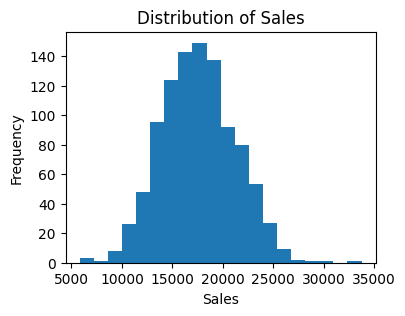

In [96]:
# Histogram of the 'sales' variable
plt.figure(figsize=(4, 3))
plt.hist(df['sales'], bins=20)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

In [97]:
# count unique stores
unique_stores = set(df['store'])
count = len(unique_stores)

print(f"Number of unique stores: {count}")

Number of unique stores: 627


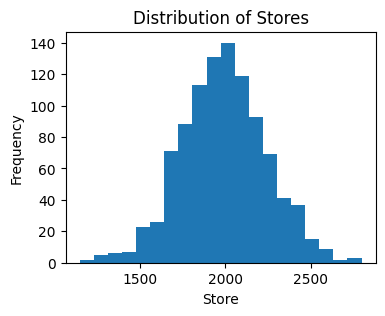

In [98]:
# Histogram of the 'stores' variable
plt.figure(figsize=(4, 3))
plt.hist(df['store'], bins=20)
plt.xlabel('Store')
plt.ylabel('Frequency')
plt.title('Distribution of Stores')
plt.show()

store
1150     8211.999723
1191    15257.738480
1273    13363.102160
1281    16058.237160
1283    12271.723010
            ...     
2637    17751.150060
2676    29732.814220
2729    26133.693990
2760    23372.276180
2798    22196.291880
Name: sales, Length: 627, dtype: float64


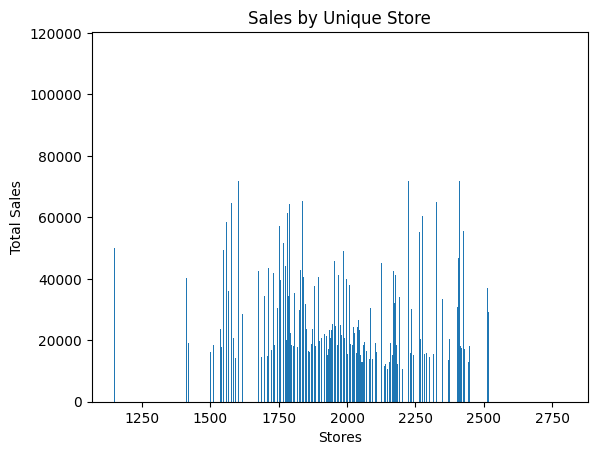

In [99]:
# Calculate total sales for each unique store
total_sales = df.groupby('store')['sales'].sum()
print(total_sales)

# Unique stores
unique_stores = list(set(df['store']))

# Plotting the chart
plt.bar(unique_stores, total_sales)
plt.xlabel('Stores')
plt.ylabel('Total Sales')
plt.title('Sales by Unique Store')
plt.show()



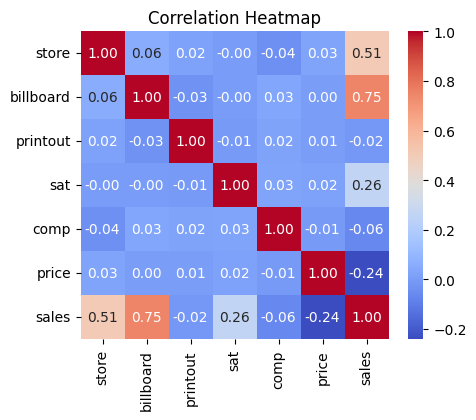

In [100]:
# Correlation heatmap
corr = df[['store', 'billboard', 'printout', 'sat', 'comp', 'price', 'sales']].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

In [101]:
# New features
df['store&bil'] = df['store'] * df['billboard']
df['store&pri'] = df['store'] * df['printout']
df['bil&pri'] = df['billboard'] * df['printout']


In [102]:
df.head()

,store,billboard,printout,sat,comp,price,sales,store&bil,store&pri,bil&pri
0,1698,698,556,68,607,95,13605.61191,1185204,944088,388088
1,2069,1075,775,72,637,101,19142.67334,2224175,1603475,833125
2,2271,615,772,71,761,95,15027.62340,1396665,1753212,474780
3,1413,1158,1098,79,1183,98,16589.65910,1636254,1551474,1271484
4,2107,1175,386,77,940,97,21887.58210,2475725,813302,453550


##**3. Split dataset**

In [103]:
# Count the number of records per unique store
records_per_store = df.groupby('store').size()

records_per_store.head()

store
1150    1
1191    1
1273    1
1281    1
1283    1
dtype: int64

In [104]:
# Split based on 'store' column
X = df.drop('sales', axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Print the split datasets
print("Train set:")
print(X_train)
print(y_train)

print("Test set:")
print(X_test)
print(y_test)

Train set:
     store  billboard  printout  sat  comp  price  store&bil  store&pri  \
541   2325        934      1137   70   596    102    2171550    2643525   
440   2121        976      1055   78   562     96    2070096    2237655   
482   1578        848       622   68   798     98    1338144     981516   
422   1973       1141       947   58   789     99    2251193    1868431   
778   1953        873       913   72   944    101    1704969    1783089   
..     ...        ...       ...  ...   ...    ...        ...        ...   
106   1775       1164       601   72   741     92    2066100    1066775   
270   1923        590       832   71   752    107    1134570    1599936   
860   1868        880       766   66   982     96    1643840    1430888   
435   2401        872      1387   68   792    101    2093672    3330187   
102   2016       1020       586   74   789    100    2056320    1181376   

     bil&pri  
541  1061958  
440  1029680  
482   527456  
422  1080527  
778   797049 

##**4. Models**

###**4.1 Linear Regression**

In [105]:
X = sm.add_constant(np.column_stack((X_train.store, X_train.billboard, X_train.printout, X_train.sat, X_train.comp, X_train.price, X_train['store&bil'], X_train['store&pri'], X_train['bil&pri'])))


In [106]:
model = sm.OLS(y_train, X)
results = model.fit()

In [107]:
# Summary of training dataset
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1012.
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        00:39:51   Log-Likelihood:                -5819.5
No. Observations:                 700   AIC:                         1.166e+04
Df Residuals:                     690   BIC:                         1.170e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9470.4866   1914.717      4.946      0.0

In [108]:
# Prepare test set
X_test = sm.add_constant(np.column_stack((X_test.store, X_test.billboard, X_test.printout, X_test.sat, X_test.comp, X_test.price, X_test['store&bil'], X_test['store&pri'], X_test['bil&pri'])))


In [109]:
# Predict sales with unseen data
y_pred = results.predict(X_test)

In [119]:
# Results Linear Regression Model
mse = mean_squared_error(y_test, y_pred)
r2 = results.rsquared
mapd = mean_absolute_percentage_error(y_test, y_pred) * 100
rmse = np.sqrt(mse)

# Calculate AIC and BIC
n = len(y_train)  # Number of samples
k = X_train.shape[1]  # Number of features + 1 (including the constant)
llf = results.llf  # Log-likelihood of the model

aic = -2 * llf + 2 * k  # AIC
bic = -2 * llf + np.log(n) * k  # BIC

print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Percentage Difference (MAPD): {mapd:.2f}")
print(f"AIC: {aic:,.2f}")
print(f"BIC: {bic:,.2f}")

Mean Squared Error (MSE): 1,037,887.96
Root Mean Squared Error (RMSE): 1,018.77
R-squared (R2): 0.93
Mean Absolute Percentage Difference (MAPD): 5.05
AIC: 11,657.07
BIC: 11,698.03
